<a href="https://colab.research.google.com/github/Suriya6744/Project_Data/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Preparing Data

In [1]:
import pandas as pd

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


##หุ้น PTT

In [2]:
ptt = pd.read_csv('/content/drive/MyDrive/Project1/PTT-Historical-Data.csv')
ptt.shape

(470, 7)

In [3]:
ptt.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,1/11/2021,38.00,38.0,38.50,37.50,54.15M,0.00%
1,2/11/2021,38.00,38.0,38.25,37.75,38.17M,0.00%
2,3/11/2021,37.75,38.0,38.25,37.50,26.75M,-0.66%
3,4/11/2021,37.50,37.5,37.75,37.00,57.08M,-0.66%
4,5/11/2021,37.25,37.5,37.75,37.25,34.20M,-0.67%


In [4]:
ptt.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [5]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
ptt=ptt[['วันเดือนปี','ล่าสุด','ปริมาณ']]
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(str)

# #แทนที่ M ด้วยช่องว่าง
# ptt['ปริมาณ'] = ptt['ปริมาณ'].str.replace('M', '', regex=True)
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(float)

# # สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
# def multiply_by_million(value):
#     return value * 1000000

# # ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
# ptt['ปริมาณ']=ptt['ปริมาณ'].apply(multiply_by_million)
# ptt['ปริมาณ']=ptt['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
ptt =ptt.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ptt',
                        'ปริมาณ': 'vol_ptt'})
ptt



,date,cp_ptt,vol_ptt
0,1/11/2021,38.00,54.15M
1,2/11/2021,38.00,38.17M
2,3/11/2021,37.75,26.75M
3,4/11/2021,37.50,57.08M
4,5/11/2021,37.25,34.20M
...,...,...,...
465,29/9/2023,33.50,46.07M
466,2/10/2023,33.25,94.91M
467,3/10/2023,32.50,137.56M
468,4/10/2023,32.25,52.16M


In [6]:
ptt['vol_ptt']=ptt['vol_ptt'].astype(str)

# #แทนที่ M ด้วยช่องว่าง
ptt['vol_ptt'] = ptt['vol_ptt'].str.replace('M', '', regex=True)
ptt['vol_ptt']=ptt['vol_ptt'].astype(float)

# # สร้างฟังก์ชันที่คูณค่าทุกค่าในคอลัมน์ด้วย 1,000,000
def multiply_by_million(value):
     return value * 1000000

# # ใช้ .apply() เพื่อคูณค่าในคอลัมน์ 'Column1' และ 'Column2' ด้วย 1,000,000
ptt['vol_ptt']=ptt['vol_ptt'].apply(multiply_by_million)
ptt['vol_ptt']=ptt['vol_ptt'].astype(int)
ptt

,date,cp_ptt,vol_ptt
0,1/11/2021,38.00,54150000
1,2/11/2021,38.00,38170000
2,3/11/2021,37.75,26750000
3,4/11/2021,37.50,57080000
4,5/11/2021,37.25,34200000
...,...,...,...
465,29/9/2023,33.50,46070000
466,2/10/2023,33.25,94910000
467,3/10/2023,32.50,137560000
468,4/10/2023,32.25,52160000


##หุ้น SCG

In [7]:
scg = pd.read_csv('/content/drive/MyDrive/Project1/SCG-Historical-Data.csv')
scg.shape


(470, 7)

In [8]:
scg.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,1/11/2021,6.75,6.70,6.95,6.20,2.60M,10.66%
1,2/11/2021,6.00,6.65,6.65,5.75,2.38M,-11.11%
2,3/11/2021,5.55,5.90,5.95,5.55,798.60K,-7.50%
3,4/11/2021,5.65,5.60,5.70,5.55,344.50K,1.80%
4,5/11/2021,5.70,5.75,5.75,5.60,376.50K,0.88%


In [9]:
scg.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [10]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
scg=scg[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
# scg['ปริมาณ'] = scg['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
# scg['ปริมาณ']=scg['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
scg=scg.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_scg',
                        'ปริมาณ': 'vol_scg'})
scg

,date,cp_scg,vol_scg
0,1/11/2021,6.75,2.60M
1,2/11/2021,6.00,2.38M
2,3/11/2021,5.55,798.60K
3,4/11/2021,5.65,344.50K
4,5/11/2021,5.70,376.50K
...,...,...,...
465,29/9/2023,3.64,5.80K
466,2/10/2023,3.70,10.90K
467,3/10/2023,3.50,26.60K
468,4/10/2023,3.60,33.10K


In [11]:
scg['vol_scg'] = scg['vol_scg'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
scg['vol_scg']=scg['vol_scg'].astype(int)
scg

,date,cp_scg,vol_scg
0,1/11/2021,6.75,2600000
1,2/11/2021,6.00,2380000
2,3/11/2021,5.55,798600
3,4/11/2021,5.65,344500
4,5/11/2021,5.70,376500
...,...,...,...
465,29/9/2023,3.64,5800
466,2/10/2023,3.70,10900
467,3/10/2023,3.50,26600
468,4/10/2023,3.60,33100


##หุ้น SOLAR

In [12]:
solar = pd.read_csv('/content/drive/MyDrive/Project1/SOLAR-Historical-Data.csv')
solar.shape


(470, 7)

In [13]:
solar.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,1/11/2021,1.81,1.87,1.87,1.81,3.37M,-3.21%
1,2/11/2021,1.76,1.81,1.82,1.72,5.91M,-2.76%
2,3/11/2021,1.74,1.76,1.80,1.74,2.75M,-1.14%
3,4/11/2021,1.84,1.74,1.84,1.74,2.84M,5.75%
4,5/11/2021,1.82,1.86,1.86,1.80,1.59M,-1.09%


In [14]:
solar.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ        False
% เปลี่ยน     False
dtype: bool

In [15]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
solar=solar[['วันเดือนปี','ล่าสุด','ปริมาณ']]

# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
# solar['ปริมาณ'] = solar['ปริมาณ'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
# solar['ปริมาณ']=solar['ปริมาณ'].astype(int)

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
solar=solar.rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_solar',
                        'ปริมาณ': 'vol_solar'})
solar

,date,cp_solar,vol_solar
0,1/11/2021,1.81,3.37M
1,2/11/2021,1.76,5.91M
2,3/11/2021,1.74,2.75M
3,4/11/2021,1.84,2.84M
4,5/11/2021,1.82,1.59M
...,...,...,...
465,29/9/2023,0.73,827.10K
466,2/10/2023,0.72,2.33M
467,3/10/2023,0.71,1.73M
468,4/10/2023,0.72,512.50K


In [16]:
# แปลงค่าในคอลัมน์ 'ปริมาณ' ตามเงื่อนไข
solar['vol_solar'] = solar['vol_solar'].str.replace('K', 'e3').str.replace('M', 'e6').astype(float)
solar['vol_solar']=solar['vol_solar'].astype(int)
solar

,date,cp_solar,vol_solar
0,1/11/2021,1.81,3370000
1,2/11/2021,1.76,5910000
2,3/11/2021,1.74,2750000
3,4/11/2021,1.84,2840000
4,5/11/2021,1.82,1590000
...,...,...,...
465,29/9/2023,0.73,827100
466,2/10/2023,0.72,2330000
467,3/10/2023,0.71,1730000
468,4/10/2023,0.72,512500


## ราคาน้ำมันดิบ (WTI)

In [17]:
wti = pd.read_csv('/content/drive/MyDrive/Project1/WTI_USD-Historical-Data.csv')
wti.shape

(598, 7)

In [18]:
wti.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,1/11/2021,84.23,83.36,85.25,83.17,NaN,1.07%
1,2/11/2021,83.28,84.22,84.77,82.89,NaN,-1.13%
2,3/11/2021,80.66,83.26,83.31,80.02,NaN,-3.15%
3,4/11/2021,80.05,80.67,83.70,78.57,NaN,-0.76%
4,5/11/2021,81.44,80.05,82.07,79.25,NaN,1.74%


In [19]:
wti.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [20]:
wti.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [21]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
wti=wti[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
wti =wti .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_wti'})
wti

,date,cp_wti
0,1/11/2021,84.23
1,2/11/2021,83.28
2,3/11/2021,80.66
3,4/11/2021,80.05
4,5/11/2021,81.44
...,...,...
593,1/10/2023,91.50
594,2/10/2023,88.94
595,3/10/2023,89.72
596,4/10/2023,84.62


##ราคาทองคำ (XAU)

In [22]:
xau = pd.read_csv('/content/drive/MyDrive/Project1/XAU_USD-Historical-Data.csv')
xau.shape

(503, 7)

In [23]:
xau.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,1/11/2021,"1,793.05","1,783.24","1,796.20","1,778.89",NaN,0.57%
1,2/11/2021,"1,787.28","1,793.61","1,796.91","1,785.78",NaN,-0.32%
2,3/11/2021,"1,769.52","1,787.71","1,788.42","1,758.45",NaN,-0.99%
3,4/11/2021,"1,791.70","1,769.98","1,799.26","1,769.13",NaN,1.25%
4,5/11/2021,"1,816.73","1,792.14","1,818.61","1,785.17",NaN,1.40%


In [24]:
xau.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [25]:
xau.dtypes

วันเดือนปี     object
ล่าสุด         object
ราคาเปิด       object
สูงสุด         object
ต่ำสุด         object
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [26]:
#เลือกเฉพาะคอลัมน์ที่ต้องการ
xau=xau[['วันเดือนปี','ล่าสุด']]

# ใช้ .rename() เพื่อเปลี่ยนชื่อคอลัมน์
xau =xau .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_xau'})
xau['cp_xau'] = xau['cp_xau'].str.replace(',', '').astype(float)
xau

,date,cp_xau
0,1/11/2021,1793.05
1,2/11/2021,1787.28
2,3/11/2021,1769.52
3,4/11/2021,1791.70
4,5/11/2021,1816.73
...,...,...
498,29/9/2023,1848.31
499,2/10/2023,1827.40
500,3/10/2023,1822.81
501,4/10/2023,1821.08


##อัตราแลกเปลี่ยน (EX)

In [27]:
ex = pd.read_csv('/content/drive/MyDrive/Project1/USD_THB-Historical-Data.csv')
ex.shape

(504, 7)

In [28]:
ex.head()

,วันเดือนปี,ล่าสุด,ราคาเปิด,สูงสุด,ต่ำสุด,ปริมาณ,% เปลี่ยน
0,1/11/2021,33.29,33.310,33.490,33.270,NaN,0.00%
1,2/11/2021,33.26,33.295,33.345,33.220,NaN,-0.09%
2,3/11/2021,33.30,33.265,33.460,33.255,NaN,0.12%
3,4/11/2021,33.34,33.300,33.470,33.260,NaN,0.12%
4,5/11/2021,33.20,33.360,33.395,33.140,NaN,-0.42%


In [29]:
ex.isnull().any()

วันเดือนปี    False
ล่าสุด        False
ราคาเปิด      False
สูงสุด        False
ต่ำสุด        False
ปริมาณ         True
% เปลี่ยน     False
dtype: bool

In [30]:
ex.dtypes

วันเดือนปี     object
ล่าสุด        float64
ราคาเปิด      float64
สูงสุด        float64
ต่ำสุด        float64
ปริมาณ        float64
% เปลี่ยน      object
dtype: object

In [31]:
ex =ex .rename(columns={'วันเดือนปี':'date','ล่าสุด': 'cp_ex'})
ex = ex[['date' ,'cp_ex']]
ex

,date,cp_ex
0,1/11/2021,33.29
1,2/11/2021,33.26
2,3/11/2021,33.30
3,4/11/2021,33.34
4,5/11/2021,33.20
...,...,...
499,29/9/2023,36.51
500,2/10/2023,36.93
501,3/10/2023,37.05
502,4/10/2023,36.89


##Merge Table

In [32]:
tm1 = wti.merge(ex, how ='left', left_on=['date',], right_on=['date',])
tm2 = tm1.merge(xau, how ='left', left_on=['date',], right_on=['date',])
tm3 = tm2.merge(ptt, how ='left', left_on=['date',], right_on=['date',])
tm4 = tm3.merge(scg, how ='left', left_on=['date',], right_on=['date',])
tm5 = tm4.merge(solar, how ='left', left_on=['date',], right_on=['date',])
all_data = tm5

In [33]:
all_data.isnull().any()

date         False
cp_wti       False
cp_ex         True
cp_xau        True
cp_ptt        True
vol_ptt       True
cp_scg        True
vol_scg       True
cp_solar      True
vol_solar     True
dtype: bool

In [34]:
all_data['date'] = all_data['date'].str.replace('/', '-')
all_data

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,1-11-2021,84.23,33.29,1793.05,38.00,54150000.0,6.75,2600000.0,1.81,3370000.0
1,2-11-2021,83.28,33.26,1787.28,38.00,38170000.0,6.00,2380000.0,1.76,5910000.0
2,3-11-2021,80.66,33.30,1769.52,37.75,26750000.0,5.55,798600.0,1.74,2750000.0
3,4-11-2021,80.05,33.34,1791.70,37.50,57080000.0,5.65,344500.0,1.84,2840000.0
4,5-11-2021,81.44,33.20,1816.73,37.25,34200000.0,5.70,376500.0,1.82,1590000.0
...,...,...,...,...,...,...,...,...,...,...
593,1-10-2023,91.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
594,2-10-2023,88.94,36.93,1827.40,33.25,94910000.0,3.70,10900.0,0.72,2330000.0
595,3-10-2023,89.72,37.05,1822.81,32.50,137560000.0,3.50,26600.0,0.71,1730000.0
596,4-10-2023,84.62,36.89,1821.08,32.25,52160000.0,3.60,33100.0,0.72,512500.0


In [35]:
#all_data.to_csv('Project.csv', index=False)

##แทนค่าสูญหาย

In [36]:
all_data.isnull().any()

date         False
cp_wti       False
cp_ex         True
cp_xau        True
cp_ptt        True
vol_ptt       True
cp_scg        True
vol_scg       True
cp_solar      True
vol_solar     True
dtype: bool

In [37]:
all_data.columns

Index(['date', 'cp_wti', 'cp_ex', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg',
       'vol_scg', 'cp_solar', 'vol_solar'],
      dtype='object')

In [38]:
# ใช้ fillna() เพื่อแทนค่าว่างด้วยค่าก่อนหน้า
all_data.fillna(method='ffill', inplace=True)
all_data

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,1-11-2021,84.23,33.29,1793.05,38.00,54150000.0,6.75,2600000.0,1.81,3370000.0
1,2-11-2021,83.28,33.26,1787.28,38.00,38170000.0,6.00,2380000.0,1.76,5910000.0
2,3-11-2021,80.66,33.30,1769.52,37.75,26750000.0,5.55,798600.0,1.74,2750000.0
3,4-11-2021,80.05,33.34,1791.70,37.50,57080000.0,5.65,344500.0,1.84,2840000.0
4,5-11-2021,81.44,33.20,1816.73,37.25,34200000.0,5.70,376500.0,1.82,1590000.0
...,...,...,...,...,...,...,...,...,...,...
593,1-10-2023,91.50,36.51,1848.31,33.50,46070000.0,3.64,5800.0,0.73,827100.0
594,2-10-2023,88.94,36.93,1827.40,33.25,94910000.0,3.70,10900.0,0.72,2330000.0
595,3-10-2023,89.72,37.05,1822.81,32.50,137560000.0,3.50,26600.0,0.71,1730000.0
596,4-10-2023,84.62,36.89,1821.08,32.25,52160000.0,3.60,33100.0,0.72,512500.0


In [39]:
all_data.isnull().any()

date         False
cp_wti       False
cp_ex        False
cp_xau       False
cp_ptt       False
vol_ptt      False
cp_scg       False
vol_scg      False
cp_solar     False
vol_solar    False
dtype: bool

In [40]:
# คูณคอลัมน์ 'cp_wti' ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_wti'] = all_data['cp_wti'] * all_data['cp_ex']
# คูณคอลัมน์ 'cp_xau ด้วยคอลัมน์ 'cp_ex' เพื่อแปลงหน่วย USD ให้เป็น THB
all_data['cp_xau'] = all_data['cp_xau'] * all_data['cp_ex']
all_data

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,1-11-2021,2804.0167,33.29,59690.6345,38.00,54150000.0,6.75,2600000.0,1.81,3370000.0
1,2-11-2021,2769.8928,33.26,59444.9328,38.00,38170000.0,6.00,2380000.0,1.76,5910000.0
2,3-11-2021,2685.9780,33.30,58925.0160,37.75,26750000.0,5.55,798600.0,1.74,2750000.0
3,4-11-2021,2668.8670,33.34,59735.2780,37.50,57080000.0,5.65,344500.0,1.84,2840000.0
4,5-11-2021,2703.8080,33.20,60315.4360,37.25,34200000.0,5.70,376500.0,1.82,1590000.0
...,...,...,...,...,...,...,...,...,...,...
593,1-10-2023,3340.6650,36.51,67481.7981,33.50,46070000.0,3.64,5800.0,0.73,827100.0
594,2-10-2023,3284.5542,36.93,67485.8820,33.25,94910000.0,3.70,10900.0,0.72,2330000.0
595,3-10-2023,3324.1260,37.05,67535.1105,32.50,137560000.0,3.50,26600.0,0.71,1730000.0
596,4-10-2023,3121.6318,36.89,67179.6412,32.25,52160000.0,3.60,33100.0,0.72,512500.0


In [41]:
all_data = round(all_data, 2) #ทศนิยม 2 ตำแหน่ง
all_data

,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,1-11-2021,2804.02,33.29,59690.63,38.00,54150000.0,6.75,2600000.0,1.81,3370000.0
1,2-11-2021,2769.89,33.26,59444.93,38.00,38170000.0,6.00,2380000.0,1.76,5910000.0
2,3-11-2021,2685.98,33.30,58925.02,37.75,26750000.0,5.55,798600.0,1.74,2750000.0
3,4-11-2021,2668.87,33.34,59735.28,37.50,57080000.0,5.65,344500.0,1.84,2840000.0
4,5-11-2021,2703.81,33.20,60315.44,37.25,34200000.0,5.70,376500.0,1.82,1590000.0
...,...,...,...,...,...,...,...,...,...,...
593,1-10-2023,3340.66,36.51,67481.80,33.50,46070000.0,3.64,5800.0,0.73,827100.0
594,2-10-2023,3284.55,36.93,67485.88,33.25,94910000.0,3.70,10900.0,0.72,2330000.0
595,3-10-2023,3324.13,37.05,67535.11,32.50,137560000.0,3.50,26600.0,0.71,1730000.0
596,4-10-2023,3121.63,36.89,67179.64,32.25,52160000.0,3.60,33100.0,0.72,512500.0


In [42]:
# save data
#all_data.to_csv('Project_data.csv', index=False)

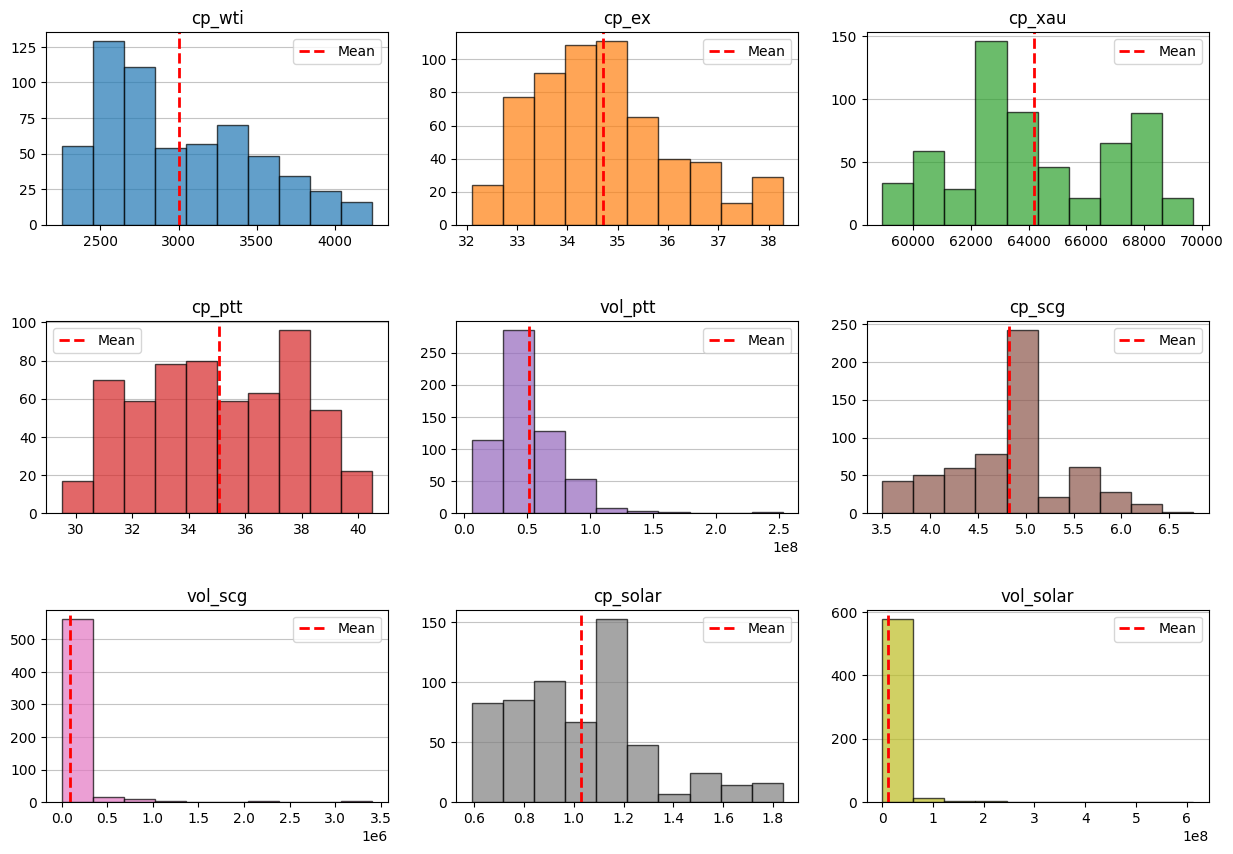

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# กำหนดสีและ alpha สำหรับแต่ละคอลัมน์
color = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
         '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']

# สร้าง histogram สำหรับทุกคอลัมน์ที่เป็นตัวเลข
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 10))
plt.subplots_adjust(hspace=0.5)

for i, col in enumerate(all_data.columns[1:]):
    ax = axes[i // 3, i % 3]
    n, bins, patches = ax.hist(all_data[col], bins=10, color=color[i], alpha=0.7, edgecolor='black')
    ax.set_title(col)
    ax.set_xlabel('')
    ax.grid(axis='y', alpha=0.75)
    ax.set_axisbelow(True)

    # เพิ่มเส้นแนะนำ (แบบเส้นกำกับ) สำหรับค่าเฉลี่ย
    mean_value = all_data[col].mean()
    ax.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label='Mean')
    ax.legend()

plt.show()

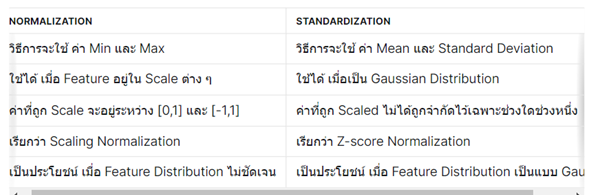

## Normalization

In [44]:
all_data_X = all_data[['cp_wti', 'cp_ex', 'cp_xau', 'cp_ptt', 'vol_ptt', 'cp_scg','vol_scg', 'cp_solar', 'vol_solar']]
all_data_X

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,2804.02,33.29,59690.63,38.00,54150000.0,6.75,2600000.0,1.81,3370000.0
1,2769.89,33.26,59444.93,38.00,38170000.0,6.00,2380000.0,1.76,5910000.0
2,2685.98,33.30,58925.02,37.75,26750000.0,5.55,798600.0,1.74,2750000.0
3,2668.87,33.34,59735.28,37.50,57080000.0,5.65,344500.0,1.84,2840000.0
4,2703.81,33.20,60315.44,37.25,34200000.0,5.70,376500.0,1.82,1590000.0
...,...,...,...,...,...,...,...,...,...
593,3340.66,36.51,67481.80,33.50,46070000.0,3.64,5800.0,0.73,827100.0
594,3284.55,36.93,67485.88,33.25,94910000.0,3.70,10900.0,0.72,2330000.0
595,3324.13,37.05,67535.11,32.50,137560000.0,3.50,26600.0,0.71,1730000.0
596,3121.63,36.89,67179.64,32.25,52160000.0,3.60,33100.0,0.72,512500.0


In [45]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# สร้าง object MinMaxScaler
scaler = MinMaxScaler()

# Fit และ Transform ข้อมูล
normalized_data = scaler.fit_transform(all_data_X)

# สร้าง DataFrame ใหม่จากข้อมูลที่ปรับแล้ว
normalized_df = pd.DataFrame(normalized_data, columns=all_data_X.columns)

# สร้าง DataFrame ของคอลัมน์ 'date'
date = all_data[['date']]

# รวม DataFrame ของ 'date' และ DataFrame ของข้อมูลที่แทนค่าสูญหาย
cm_df = pd.concat([date, normalized_df], axis=1)
cm_df


,date,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
0,1-11-2021,0.277707,0.192557,0.071054,0.772727,0.194120,1.000000,0.762422,0.976,0.005396
1,2-11-2021,0.260553,0.187702,0.048251,0.772727,0.129319,0.769231,0.697894,0.936,0.009544
2,3-11-2021,0.218380,0.194175,0.000000,0.750000,0.083009,0.630769,0.234059,0.920,0.004383
3,4-11-2021,0.209781,0.200647,0.075198,0.727273,0.206002,0.661538,0.100868,1.000,0.004530
4,5-11-2021,0.227341,0.177994,0.129041,0.704545,0.113220,0.676923,0.110254,0.984,0.002489
...,...,...,...,...,...,...,...,...,...,...
593,1-10-2023,0.547423,0.713592,0.794131,0.363636,0.161354,0.043077,0.001525,0.112,0.001243
594,2-10-2023,0.519222,0.781553,0.794510,0.340909,0.359408,0.061538,0.003021,0.104,0.003697
595,3-10-2023,0.539115,0.800971,0.799079,0.272727,0.532360,0.000000,0.007626,0.096,0.002718
596,4-10-2023,0.437338,0.775081,0.766089,0.250000,0.186050,0.030769,0.009532,0.104,0.000729


In [46]:
#หาความสัมพันธ์
correlation_matrix = normalized_df.corr()
correlation_matrix

,cp_wti,cp_ex,cp_xau,cp_ptt,vol_ptt,cp_scg,vol_scg,cp_solar,vol_solar
cp_wti,1.000000,0.301809,-0.056256,0.434389,0.165694,0.124637,-0.082147,0.206325,0.185775
cp_ex,0.301809,1.000000,0.149434,-0.260030,0.019776,-0.355428,-0.192445,-0.238386,-0.085138
cp_xau,-0.056256,0.149434,1.000000,-0.562232,-0.058313,-0.854403,-0.285461,-0.752420,-0.003242
cp_ptt,0.434389,-0.260030,-0.562232,1.000000,0.117170,0.629312,0.187711,0.708100,0.159444
vol_ptt,0.165694,0.019776,-0.058313,0.117170,1.000000,0.053732,0.016815,0.026015,-0.053462
cp_scg,0.124637,-0.355428,-0.854403,0.629312,0.053732,1.000000,0.399367,0.853706,0.083536
vol_scg,-0.082147,-0.192445,-0.285461,0.187711,0.016815,0.399367,1.000000,0.336427,0.008957
cp_solar,0.206325,-0.238386,-0.752420,0.708100,0.026015,0.853706,0.336427,1.000000,0.170359
vol_solar,0.185775,-0.085138,-0.003242,0.159444,-0.053462,0.083536,0.008957,0.170359,1.000000


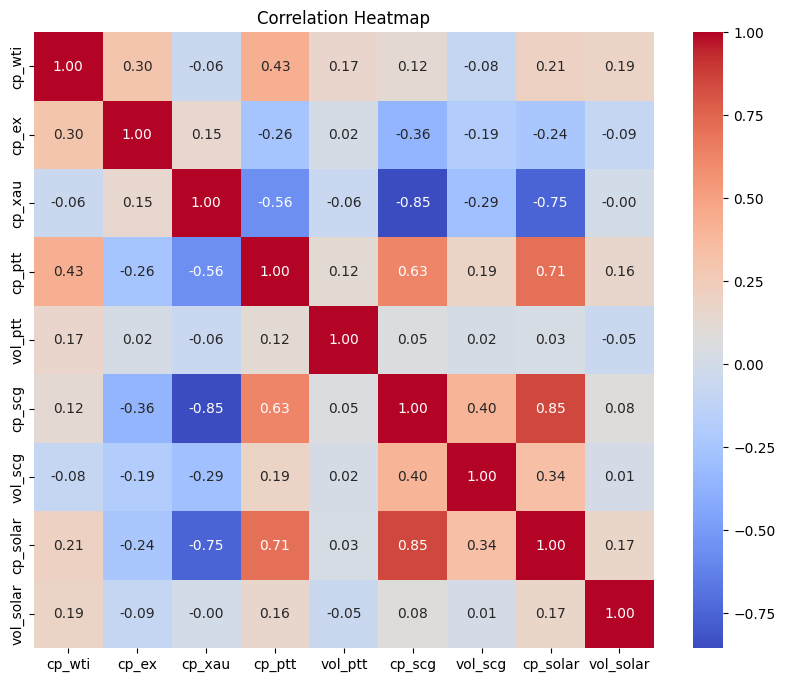

In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

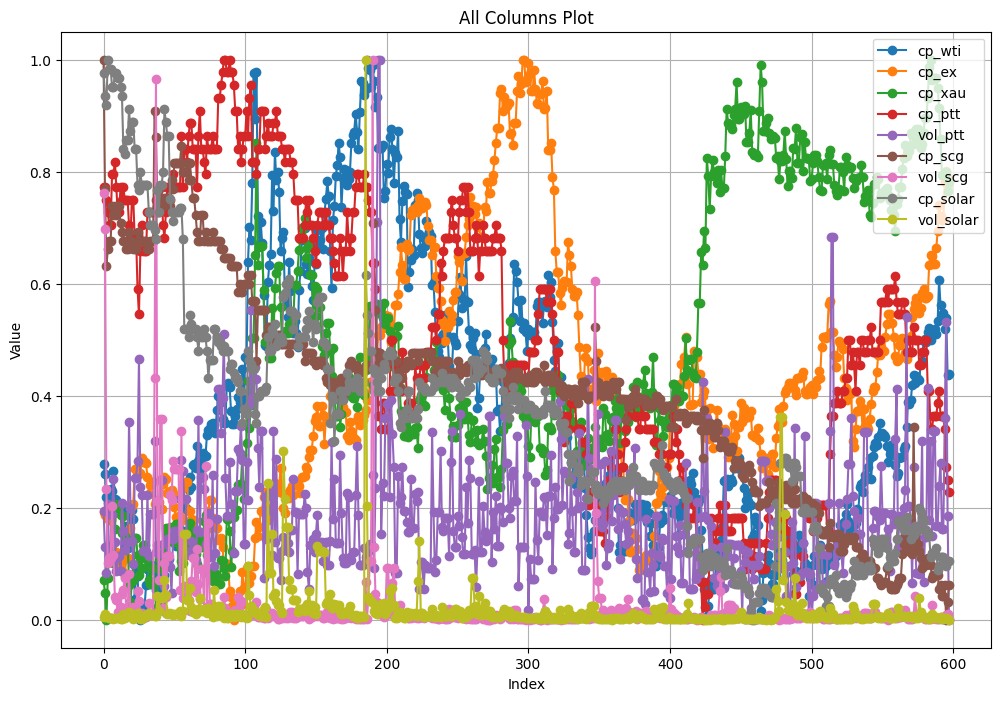

In [48]:
plt.figure(figsize=(12, 8))
for column in normalized_df.columns:
    plt.plot(normalized_df.index, normalized_df[column], marker='o', linestyle='-', label=column)

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('All Columns Plot')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()

#LSTM SCG

In [51]:
b = normalized_df[['cp_scg','cp_wti','cp_ex','cp_xau','vol_scg']]
b

,cp_scg,cp_wti,cp_ex,cp_xau,vol_scg
0,1.000000,0.277707,0.192557,0.071054,0.762422
1,0.769231,0.260553,0.187702,0.048251,0.697894
2,0.630769,0.218380,0.194175,0.000000,0.234059
3,0.661538,0.209781,0.200647,0.075198,0.100868
4,0.676923,0.227341,0.177994,0.129041,0.110254
...,...,...,...,...,...
593,0.043077,0.547423,0.713592,0.794131,0.001525
594,0.061538,0.519222,0.781553,0.794510,0.003021
595,0.000000,0.539115,0.800971,0.799079,0.007626
596,0.030769,0.437338,0.775081,0.766089,0.009532


In [52]:
# กำหนดตัวแปรอิสระ (independent variables) และตัวแปรตาม (dependent variable)
X = b[['cp_wti', 'cp_ex', 'cp_xau', 'vol_scg']]
y = b['cp_scg']

# คำนวณจำนวนแถวที่ต้องการให้เป็นชุดข้อมูลการทดสอบ
test_size = int(len(b) * 0.2)

# ใช้ iloc เพื่อแบ่งชุดข้อมูล
X_train = X.iloc[:-test_size]
X_test = X.iloc[-test_size:]
y_train = y.iloc[:-test_size]
y_test = y.iloc[-test_size:]

##หาพารามิเตอร์

In [53]:
from itertools import product
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
# กำหนดพารามิเตอร์ที่จะทดลอง
param_grid = {
    'neurons_1': [100, 150],
    'neurons_2': [50, 100],
    'epochs': [50, 100, 200],
    'batch_size': [32, 64, 128]
}

best_model = None
best_mse = float('inf')

# ลูปผ่านพารามิเตอร์ที่จะทดลอง
for params in product(param_grid['neurons_1'], param_grid['neurons_2'], param_grid['epochs'], param_grid['batch_size']):
    neurons_1, neurons_2, epochs, batch_size = params

    # สร้างและคอมไพล์โมเดล LSTM
    model = Sequential()
    model.add(LSTM(neurons_1, activation='tanh', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(neurons_2, activation='tanh'))
    model.add(Dense(1))
    optimizer = Adam()
    model.compile(optimizer=optimizer, loss='mse')

    # แปลงข้อมูลให้เป็นรูปแบบที่เหมาะสมสำหรับ LSTM
    X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

    # ทำการฝึกโมเดล
    model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # ทดสอบโมเดล
    X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
    y_pred = model.predict(X_test_reshaped)

    # คำนวณค่า MSE
    mse = mean_squared_error(y_test, y_pred)

    # บันทึกโมเดลที่มี MSE ต่ำที่สุด
    if mse < best_mse:
        best_mse = mse
        best_model = model
        best_params = {'neurons_1': neurons_1, 'neurons_2': neurons_2, 'epochs': epochs, 'batch_size': batch_size}

print("Best Parameters:", best_params)
print("Best MSE:", best_mse)



4/4 [==============================] - 0s 6ms/step
Best Parameters: {'neurons_1': 150, 'neurons_2': 100, 'epochs': 50, 'batch_size': 128}
Best MSE: 0.01849007159638175


##Fitt และ พยากรณ์

In [56]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np
# Define the independent variables (features) and dependent variable (target)
X = b[['cp_wti', 'cp_ex', 'cp_xau', 'vol_scg']]
y = b['cp_scg']

# Define the size of your test set (you can adjust the ratio as needed)
test_size = int(len(X) * 0.2)

# Split the data into training and testing sets
X_train = X.iloc[:-test_size]
X_test = X.iloc[-test_size:]
y_train = y.iloc[:-test_size]
y_test = y.iloc[-test_size:]

# Define the neural network model
model = Sequential()
model.add(LSTM(150, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(100, activation='tanh'))
model.add(Dense(1))

# Compile the model with an optimizer and a loss function

model.compile(optimizer=Adam(), loss='mse')

# Train the model on the training data
model.fit(X_train, y_train, epochs=50, batch_size=128, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)


4/4 [==============================] - 0s 5ms/step


##เปรียบเทียบค่าจริงและค่าพยากรณ์

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame for comparison
lstm_ptt_pd = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

# Print the comparison table
lstm_ptt_pd


##แปลงค่ากลับ

In [ ]:
max_original = all_data_X['cp_ptt'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_ptt'].min()  # Min Value ของข้อมูลเดิม

lstm_ptt_pd['Actual'] = (lstm_ptt_pd['Actual'] * (max_original - min_original)) +min_original
lstm_ptt_pd['Predicted'] = (lstm_ptt_pd['Predicted'] * (max_original - min_original)) + min_original

# Print the DataFrame with original values
lstm_ptt_pd

##ความคลาดเคลื่อน

In [ ]:
mse = mean_squared_error(lstm_ptt_pd['Actual'], lstm_ptt_pd['Predicted'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(lstm_ptt_pd['Actual'])
mape = (1/n) * np.sum(np.abs((lstm_ptt_pd['Actual'] - lstm_ptt_pd['Predicted']) /lstm_ptt_pd['Actual'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.4}%")

##กราฟ

In [ ]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(all_data_X['cp_ptt'].values, label='Actual Prices', color='blue')
plt.plot(lstm_ptt_pd['Predicted'], label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

#LSTM PTT

In [49]:
a = normalized_df[['cp_ptt','cp_wti','cp_ex','cp_xau','vol_ptt']]
a

,cp_ptt,cp_wti,cp_ex,cp_xau,vol_ptt
0,0.772727,0.277707,0.192557,0.071054,0.194120
1,0.772727,0.260553,0.187702,0.048251,0.129319
2,0.750000,0.218380,0.194175,0.000000,0.083009
3,0.727273,0.209781,0.200647,0.075198,0.206002
4,0.704545,0.227341,0.177994,0.129041,0.113220
...,...,...,...,...,...
593,0.363636,0.547423,0.713592,0.794131,0.161354
594,0.340909,0.519222,0.781553,0.794510,0.359408
595,0.272727,0.539115,0.800971,0.799079,0.532360
596,0.250000,0.437338,0.775081,0.766089,0.186050


In [ ]:
# กำหนดตัวแปรอิสระ (independent variables) และตัวแปรตาม (dependent variable)
X = a[['cp_wti', 'cp_ex', 'cp_xau', 'vol_ptt']]
y = a['cp_ptt']

# คำนวณจำนวนแถวที่ต้องการให้เป็นชุดข้อมูลการทดสอบ
test_size = int(len(a) * 0.2)

# ใช้ iloc เพื่อแบ่งชุดข้อมูล
X_train = X.iloc[:-test_size]
X_test = X.iloc[-test_size:]
y_train = y.iloc[:-test_size]
y_test = y.iloc[-test_size:]

##หาพารามิเตอร์

In [ ]:
from itertools import product
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
# กำหนดพารามิเตอร์ที่จะทดลอง
param_grid = {
    'neurons_1': [100, 150],
    'neurons_2': [50, 100],
    'epochs': [50, 100, 200],
    'batch_size': [32, 64, 128]
}

best_model = None
best_mse = float('inf')

# ลูปผ่านพารามิเตอร์ที่จะทดลอง
for params in product(param_grid['neurons_1'], param_grid['neurons_2'], param_grid['epochs'], param_grid['batch_size']):
    neurons_1, neurons_2, epochs, batch_size = params

    # สร้างและคอมไพล์โมเดล LSTM
    model = Sequential()
    model.add(LSTM(neurons_1, activation='tanh', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(neurons_2, activation='tanh'))
    model.add(Dense(1))
    optimizer = Adam()
    model.compile(optimizer=optimizer, loss='mse')

    # แปลงข้อมูลให้เป็นรูปแบบที่เหมาะสมสำหรับ LSTM
    X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

    # ทำการฝึกโมเดล
    model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # ทดสอบโมเดล
    X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
    y_pred = model.predict(X_test_reshaped)

    # คำนวณค่า MSE
    mse = mean_squared_error(y_test, y_pred)

    # บันทึกโมเดลที่มี MSE ต่ำที่สุด
    if mse < best_mse:
        best_mse = mse
        best_model = model
        best_params = {'neurons_1': neurons_1, 'neurons_2': neurons_2, 'epochs': epochs, 'batch_size': batch_size}

print("Best Parameters:", best_params)
print("Best MSE:", best_mse)



4/4 [==============================] - 0s 3ms/step
Best Parameters: {'neurons_1': 150, 'neurons_2': 50, 'epochs': 100, 'batch_size': 32}
Best MSE: 0.04511504467199256


##Fitt และ พยากรณ์

In [ ]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np
# Define the independent variables (features) and dependent variable (target)
X = a[['cp_wti', 'cp_ex', 'cp_xau', 'vol_ptt']]
y = a['cp_ptt']

# Define the size of your test set (you can adjust the ratio as needed)
test_size = int(len(X) * 0.2)

# Split the data into training and testing sets
X_train = X.iloc[:-test_size]
X_test = X.iloc[-test_size:]
y_train = y.iloc[:-test_size]
y_test = y.iloc[-test_size:]

# Define the neural network model
model = Sequential()
model.add(LSTM(150, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1))

# Compile the model with an optimizer and a loss function

model.compile(optimizer=Adam(), loss='mse')

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)


4/4 [==============================] - 0s 4ms/step


##เปรียบเทียบค่าจริงและค่าพยากรณ์

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame for comparison
lstm_ptt_pd = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

# Print the comparison table
lstm_ptt_pd


,Actual,Predicted
479,0.159091,0.095616
480,0.159091,0.074044
481,0.181818,0.077149
482,0.181818,0.123195
483,0.159091,0.112707
...,...,...
593,0.363636,0.247539
594,0.340909,0.182640
595,0.272727,0.158561
596,0.250000,0.185433


##แปลงค่ากลับ

In [ ]:
max_original = all_data_X['cp_ptt'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_ptt'].min()  # Min Value ของข้อมูลเดิม

lstm_ptt_pd['Actual'] = (lstm_ptt_pd['Actual'] * (max_original - min_original)) +min_original
lstm_ptt_pd['Predicted'] = (lstm_ptt_pd['Predicted'] * (max_original - min_original)) + min_original

# Print the DataFrame with original values
lstm_ptt_pd

,Actual,Predicted
479,31.25,30.551771
480,31.25,30.314484
481,31.50,30.348644
482,31.50,30.855143
483,31.25,30.739777
...,...,...
593,33.50,32.222927
594,33.25,31.509039
595,32.50,31.244171
596,32.25,31.539762


##ความคลาดเคลื่อน

In [ ]:
mse = mean_squared_error(lstm_ptt_pd['Actual'], lstm_ptt_pd['Predicted'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(lstm_ptt_pd['Actual'])
mape = (1/n) * np.sum(np.abs((lstm_ptt_pd['Actual'] - lstm_ptt_pd['Predicted']) /lstm_ptt_pd['Actual'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.4}%")

Root Mean Squared Error (RMSE) : 2.859
Mean Absolute Percentage Error (MAPE) :7.451%


##กราฟ

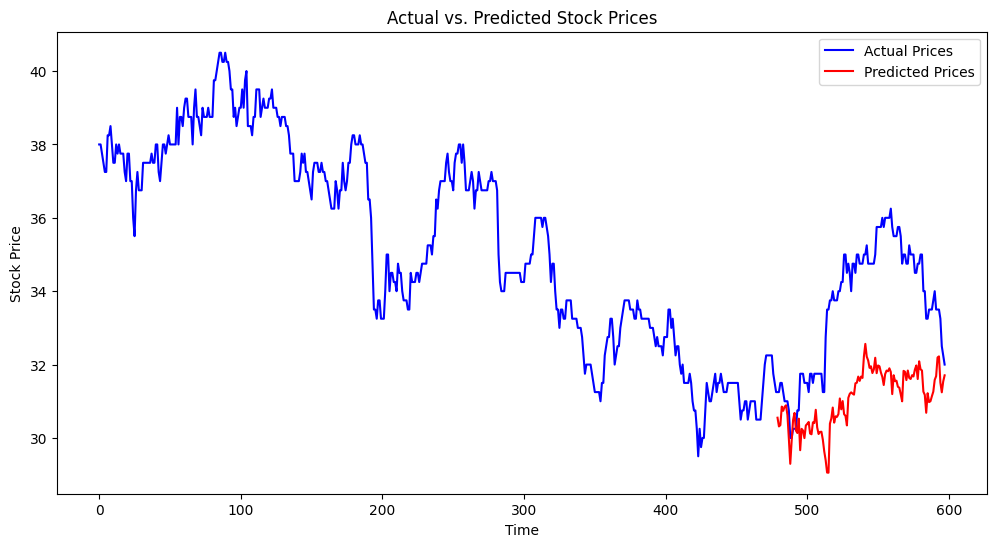

In [ ]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(all_data_X['cp_ptt'].values, label='Actual Prices', color='blue')
plt.plot(lstm_ptt_pd['Predicted'], label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()

#LSTM SOLAR

In [57]:
c = normalized_df[['cp_solar','cp_wti','cp_ex','cp_xau','vol_solar']]
c

,cp_solar,cp_wti,cp_ex,cp_xau,vol_solar
0,0.976,0.277707,0.192557,0.071054,0.005396
1,0.936,0.260553,0.187702,0.048251,0.009544
2,0.920,0.218380,0.194175,0.000000,0.004383
3,1.000,0.209781,0.200647,0.075198,0.004530
4,0.984,0.227341,0.177994,0.129041,0.002489
...,...,...,...,...,...
593,0.112,0.547423,0.713592,0.794131,0.001243
594,0.104,0.519222,0.781553,0.794510,0.003697
595,0.096,0.539115,0.800971,0.799079,0.002718
596,0.104,0.437338,0.775081,0.766089,0.000729


In [59]:
# กำหนดตัวแปรอิสระ (independent variables) และตัวแปรตาม (dependent variable)
X = c[['cp_wti', 'cp_ex', 'cp_xau', 'vol_solar']]
y = c['cp_solar']

# คำนวณจำนวนแถวที่ต้องการให้เป็นชุดข้อมูลการทดสอบ
test_size = int(len(c) * 0.2)

# ใช้ iloc เพื่อแบ่งชุดข้อมูล
X_train = X.iloc[:-test_size]
X_test = X.iloc[-test_size:]
y_train = y.iloc[:-test_size]
y_test = y.iloc[-test_size:]

##หาพารามิเตอร์

In [60]:
from itertools import product
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
# กำหนดพารามิเตอร์ที่จะทดลอง
param_grid = {
    'neurons_1': [100, 150],
    'neurons_2': [50, 100],
    'epochs': [50, 100, 200],
    'batch_size': [32, 64, 128]
}

best_model = None
best_mse = float('inf')

# ลูปผ่านพารามิเตอร์ที่จะทดลอง
for params in product(param_grid['neurons_1'], param_grid['neurons_2'], param_grid['epochs'], param_grid['batch_size']):
    neurons_1, neurons_2, epochs, batch_size = params

    # สร้างและคอมไพล์โมเดล LSTM
    model = Sequential()
    model.add(LSTM(neurons_1, activation='tanh', input_shape=(X_train.shape[1], 1)))
    model.add(Dense(neurons_2, activation='tanh'))
    model.add(Dense(1))
    optimizer = Adam()
    model.compile(optimizer=optimizer, loss='mse')

    # แปลงข้อมูลให้เป็นรูปแบบที่เหมาะสมสำหรับ LSTM
    X_train_reshaped = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))

    # ทำการฝึกโมเดล
    model.fit(X_train_reshaped, y_train, epochs=epochs, batch_size=batch_size, verbose=0)

    # ทดสอบโมเดล
    X_test_reshaped = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))
    y_pred = model.predict(X_test_reshaped)

    # คำนวณค่า MSE
    mse = mean_squared_error(y_test, y_pred)

    # บันทึกโมเดลที่มี MSE ต่ำที่สุด
    if mse < best_mse:
        best_mse = mse
        best_model = model
        best_params = {'neurons_1': neurons_1, 'neurons_2': neurons_2, 'epochs': epochs, 'batch_size': batch_size}

print("Best Parameters:", best_params)
print("Best MSE:", best_mse)



4/4 [==============================] - 0s 6ms/step
Best Parameters: {'neurons_1': 150, 'neurons_2': 50, 'epochs': 50, 'batch_size': 128}
Best MSE: 0.008399263407448489


##Fitt และ พยากรณ์

In [ ]:
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error
import tensorflow as tf
import numpy as np
# Define the independent variables (features) and dependent variable (target)
X = a[['cp_wti', 'cp_ex', 'cp_xau', 'vol_solar']]
y = a['cp_solar']

# Define the size of your test set (you can adjust the ratio as needed)
test_size = int(len(X) * 0.2)

# Split the data into training and testing sets
X_train = X.iloc[:-test_size]
X_test = X.iloc[-test_size:]
y_train = y.iloc[:-test_size]
y_test = y.iloc[-test_size:]

# Define the neural network model
model = Sequential()
model.add(LSTM(150, activation='tanh', input_shape=(X_train.shape[1], 1)))
model.add(Dense(50, activation='tanh'))
model.add(Dense(1))

# Compile the model with an optimizer and a loss function

model.compile(optimizer=Adam(), loss='mse')

# Train the model on the training data
model.fit(X_train, y_train, epochs=100, batch_size=128, verbose=0)

# Make predictions on the test set
y_pred = model.predict(X_test)


4/4 [==============================] - 0s 4ms/step


##เปรียบเทียบค่าจริงและค่าพยากรณ์

In [ ]:
import pandas as pd
import numpy as np

# Create a DataFrame for comparison
lstm_solar_pd = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})

# Print the comparison table
lstm_solar_pd


,Actual,Predicted
479,0.159091,0.095616
480,0.159091,0.074044
481,0.181818,0.077149
482,0.181818,0.123195
483,0.159091,0.112707
...,...,...
593,0.363636,0.247539
594,0.340909,0.182640
595,0.272727,0.158561
596,0.250000,0.185433


##แปลงค่ากลับ

In [ ]:
max_original = all_data_X['cp_solar'].max()  # Max Value ของข้อมูลเดิม
min_original = all_data_X['cp_solar'].min()  # Min Value ของข้อมูลเดิม

lstm_solar_pd['Actual'] = (lstm_solar_pd['Actual'] * (max_original - min_original)) +min_original
lstm_solar_pd['Predicted'] = (lstm_solar_pd['Predicted'] * (max_original - min_original)) + min_original

# Print the DataFrame with original values
lstm_solar_pd

,Actual,Predicted
479,31.25,30.551771
480,31.25,30.314484
481,31.50,30.348644
482,31.50,30.855143
483,31.25,30.739777
...,...,...
593,33.50,32.222927
594,33.25,31.509039
595,32.50,31.244171
596,32.25,31.539762


##ความคลาดเคลื่อน

In [ ]:
mse = mean_squared_error(lstm_solar_pd['Actual'], lstm_solar_pd['Predicted'])
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE) : {rmse:.4}")

n = len(lstm_solar_pd['Actual'])
mape = (1/n) * np.sum(np.abs((lstm_solar_pd['Actual'] - lstm_solar_pd['Predicted']) /lstm_solar_pd['Actual'])) *100
print(f"Mean Absolute Percentage Error (MAPE) :{mape:.4}%")

Root Mean Squared Error (RMSE) : 2.859
Mean Absolute Percentage Error (MAPE) :7.451%


##กราฟ

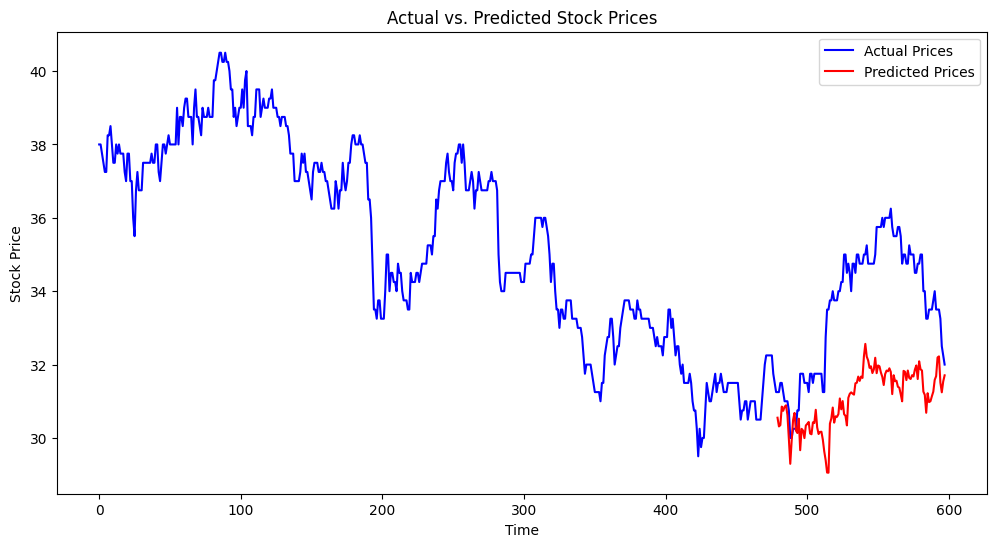

In [ ]:
# Compare predictions with actual values using a plot
plt.figure(figsize=(12, 6))
plt.plot(all_data_X['cp_ptt'].values, label='Actual Prices', color='blue')
plt.plot(lstm_solar_pd['Predicted'], label='Predicted Prices', color='red')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.title('Actual vs. Predicted Stock Prices')
plt.show()